In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [4]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

In [5]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

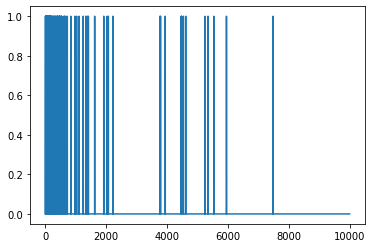

In [6]:
plt.plot(train_data[0])

In [7]:
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 5s - loss: 0.4927 - acc: 0.7998 - binary_crossentropy: 0.4927 - val_loss: 0.3318 - val_acc: 0.8770 - val_binary_crossentropy: 0.3318
Epoch 2/20
 - 3s - loss: 0.2473 - acc: 0.9104 - binary_crossentropy: 0.2473 - val_loss: 0.2828 - val_acc: 0.8895 - val_binary_crossentropy: 0.2828
Epoch 3/20
 - 3s - loss: 0.1799 - acc: 0.9367 - binary_crossentropy: 0.1799 - val_loss: 0.2932 - val_acc: 0.8834 - val_binary_crossentropy: 0.2932
Epoch 4/20
 - 3s - loss: 0.1462 - acc: 0.9497 - binary_crossentropy: 0.1462 - val_loss: 0.3304 - val_acc: 0.8720 - val_binary_crossentropy: 0.3304
Epoch 5/20
 - 3s - loss: 0.1208 - acc: 0.9594 - binary_crossentropy: 0.1208 - val_loss: 0.3401 - val_acc: 0.8736 - val_binary_crossentropy: 0.3401
Epoch 6/20
 - 3s - loss: 0.0998 - acc: 0.9686 - binary_crossentropy: 0.0998 - val_loss: 0.3708 - val_acc: 0.8704 - val_binary_crossentropy: 0.3708
Epoch 7/20
 - 3s - l

In [10]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6179 - acc: 0.6526 - binary_crossentropy: 0.6179 - val_loss: 0.5574 - val_acc: 0.8075 - val_binary_crossentropy: 0.5574
Epoch 2/20
 - 4s - loss: 0.5013 - acc: 0.8320 - binary_crossentropy: 0.5013 - val_loss: 0.5001 - val_acc: 0.8374 - val_binary_crossentropy: 0.5001
Epoch 3/20
 - 3s - loss: 0.4491 - acc: 0.8839 - binary_crossentropy: 0.4491 - val_loss: 0.4743 - val_acc: 0.8625 - val_binary_crossentropy: 0.4743
Epoch 4/20
 - 3s - loss: 0.4146 - acc: 0.9110 - binary_crossentropy: 0.4146 - val_loss: 0.4578 - val_acc: 0.8696 - val_binary_crossentropy: 0.4578
Epoch 5/20
 - 4s - loss: 0.3866 - acc: 0.9272 - binary_crossentropy: 0.3866 - val_loss: 0.4474 - val_acc: 0.8699 - val_binary_crossentropy: 0.4474
Epoch 6/20
 - 3s - loss: 0.3626 - acc: 0.9414 - binary_crossentropy: 0.3626 - val_loss: 0.4447 - val_acc: 0.8651 - val_binary_crossentropy: 0.4447
Epoch 7/20
 - 4s - loss: 0.3399 - acc: 0.9528 - binary_crossentropy:

In [13]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [14]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 22s - loss: 0.3437 - acc: 0.8550 - binary_crossentropy: 0.3437 - val_loss: 0.3099 - val_acc: 0.8725 - val_binary_crossentropy: 0.3099
Epoch 2/20
 - 22s - loss: 0.1445 - acc: 0.9484 - binary_crossentropy: 0.1445 - val_loss: 0.3293 - val_acc: 0.8745 - val_binary_crossentropy: 0.3293
Epoch 3/20
 - 27s - loss: 0.0500 - acc: 0.9854 - binary_crossentropy: 0.0500 - val_loss: 0.4596 - val_acc: 0.8667 - val_binary_crossentropy: 0.4596
Epoch 4/20
 - 21s - loss: 0.0088 - acc: 0.9980 - binary_crossentropy: 0.0088 - val_loss: 0.5831 - val_acc: 0.8679 - val_binary_crossentropy: 0.5831
Epoch 5/20
 - 21s - loss: 0.0011 - acc: 1.0000 - binary_crossentropy: 0.0011 - val_loss: 0.6714 - val_acc: 0.8712 - val_binary_crossentropy: 0.6714
Epoch 6/20
 - 23s - loss: 2.3996e-04 - acc: 1.0000 - binary_crossentropy: 2.3996e-04 - val_loss: 0.7165 - val_acc: 0.8713 - val_binary_crossentropy: 0.7165
Epoch 7/20
 - 25s - loss: 1.3621e-04 - acc: 1.0000 - b

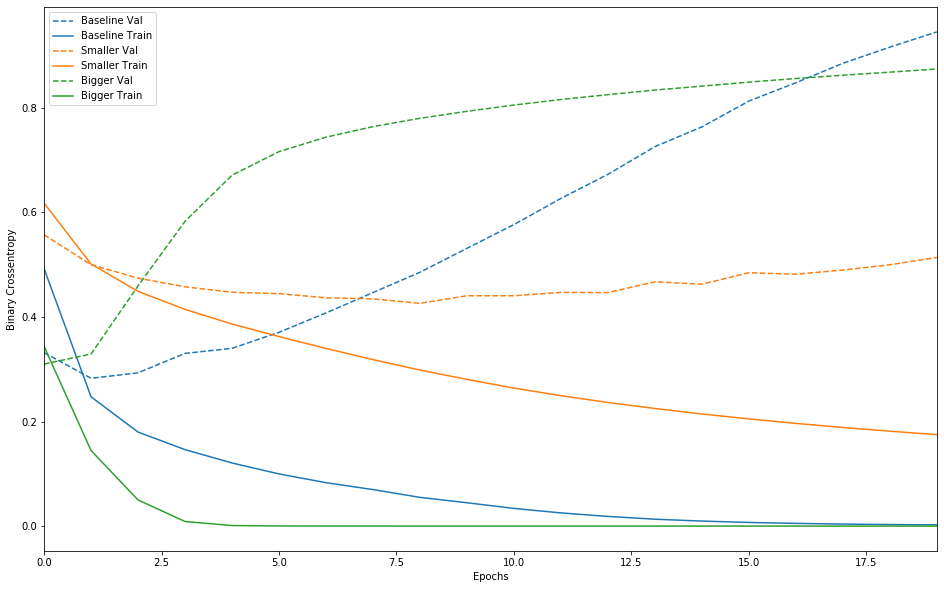

In [15]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [16]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4990 - acc: 0.8187 - binary_crossentropy: 0.4565 - val_loss: 0.3600 - val_acc: 0.8816 - val_binary_crossentropy: 0.3150
Epoch 2/20
 - 4s - loss: 0.2866 - acc: 0.9110 - binary_crossentropy: 0.2380 - val_loss: 0.3346 - val_acc: 0.8872 - val_binary_crossentropy: 0.2833
Epoch 3/20
 - 4s - loss: 0.2398 - acc: 0.9334 - binary_crossentropy: 0.1862 - val_loss: 0.3449 - val_acc: 0.8837 - val_binary_crossentropy: 0.2898
Epoch 4/20
 - 5s - loss: 0.2211 - acc: 0.9425 - binary_crossentropy: 0.1641 - val_loss: 0.3674 - val_acc: 0.8765 - val_binary_crossentropy: 0.3091
Epoch 5/20
 - 4s - loss: 0.2058 - acc: 0.9509 - binary_crossentropy: 0.1465 - val_loss: 0.3775 - val_acc: 0.8751 - val_binary_crossentropy: 0.3173
Epoch 6/20
 - 4s - loss: 0.1948 - acc: 0.9557 - binary_crossentropy: 0.1337 - val_loss: 0.3922 - val_acc: 0.8732 - val_binary_crossentropy: 0.3306
Epoch 7/20
 - 4s - loss: 0.1886 - acc: 0.9582 - binary_crossentropy:

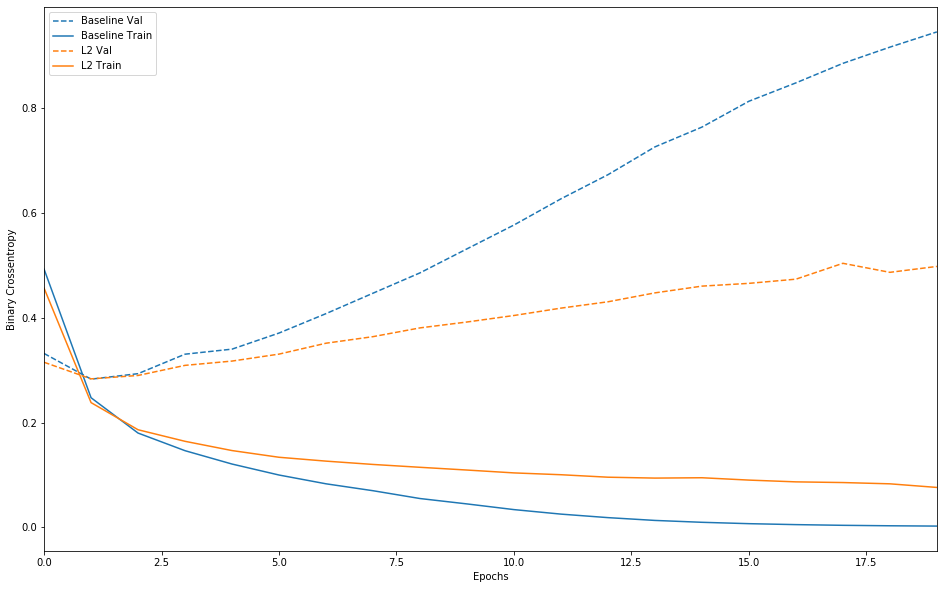

In [17]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [18]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6246 - acc: 0.6473 - binary_crossentropy: 0.6246 - val_loss: 0.4898 - val_acc: 0.8514 - val_binary_crossentropy: 0.4898
Epoch 2/20
 - 4s - loss: 0.4529 - acc: 0.8182 - binary_crossentropy: 0.4529 - val_loss: 0.3450 - val_acc: 0.8810 - val_binary_crossentropy: 0.3450
Epoch 3/20
 - 4s - loss: 0.3548 - acc: 0.8787 - binary_crossentropy: 0.3548 - val_loss: 0.3059 - val_acc: 0.8820 - val_binary_crossentropy: 0.3059
Epoch 4/20
 - 4s - loss: 0.2933 - acc: 0.9073 - binary_crossentropy: 0.2933 - val_loss: 0.2865 - val_acc: 0.8891 - val_binary_crossentropy: 0.2865
Epoch 5/20
 - 4s - loss: 0.2548 - acc: 0.9237 - binary_crossentropy: 0.2548 - val_loss: 0.2875 - val_acc: 0.8880 - val_binary_crossentropy: 0.2875
Epoch 6/20
 - 4s - loss: 0.2235 - acc: 0.9340 - binary_crossentropy: 0.2235 - val_loss: 0.2953 - val

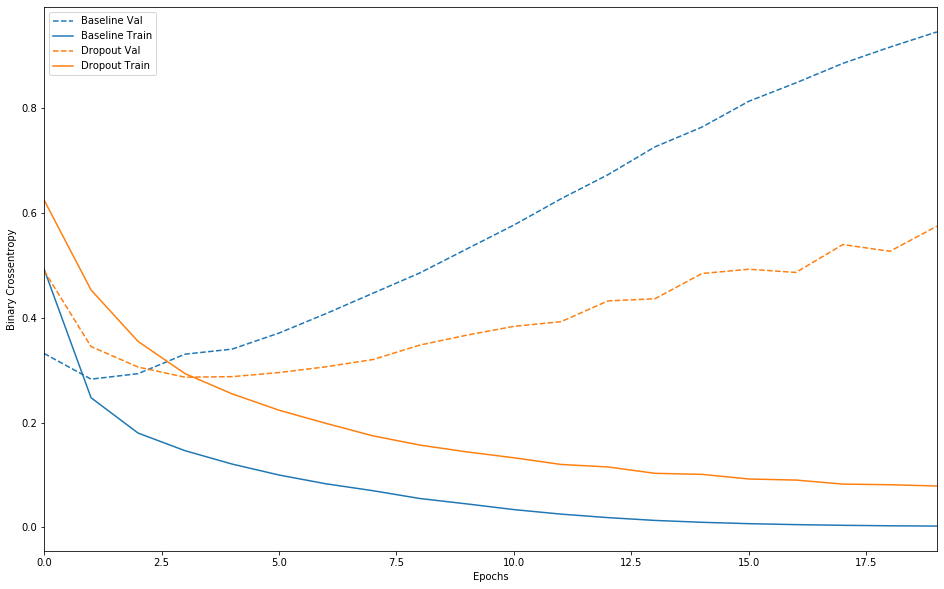

In [19]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])